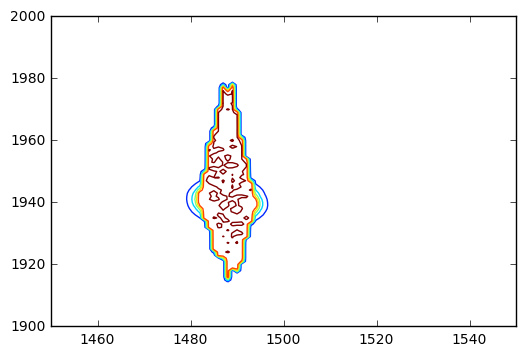

In [1]:
import astropy.io.fits as pf
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

imloc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/AllSpeed_45P/red_O170320_0061.fits")

O = pf.open(imloc[0])
D = O[0].data

x = np.arange(0,2048,1)
y = np.arange(0,2048,1)
X, Y = np.meshgrid(x,y)


plt.contour(X,Y,D)
plt.ylim(1900,2000)
plt.xlim(1450,1550)
plt.show()

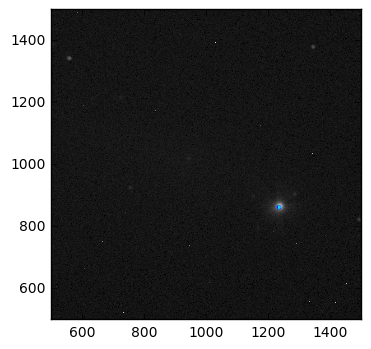

In [2]:
from matplotlib.colors import LogNorm

plt.imshow(D,cmap='gray', norm=LogNorm())
plt.contour(D)
# plt.ylim(1900,2000)
# plt.xlim(1450,1550)
plt.xlim(500,1500)
plt.ylim(500,1500)
plt.show()

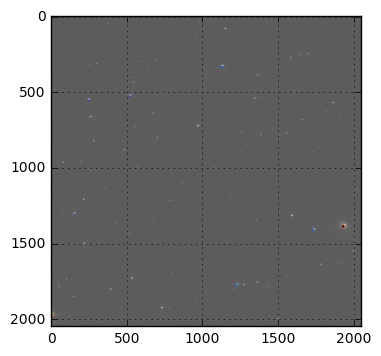

In [2]:
import astropy.io.fits as pf
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

imloc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/AllSpeed_71P/red_O170320_0150.fits")


O = pf.open(imloc[0])
D = O[0].data

size = len(D)
x = np.arange(0,size,1)
y = np.arange(0,size,1)
X, Y = np.meshgrid(x,y)

plt.imshow(D,cmap='gray', norm=LogNorm())
plt.contour(X,Y,D)

plt.grid()

plt.show()

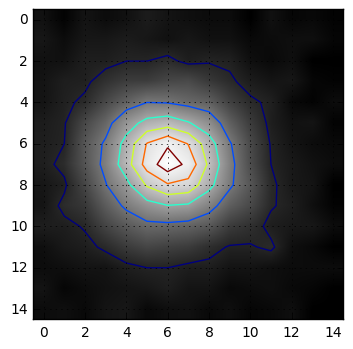

In [8]:
D_n = D[960:975,190:205]
plt.imshow(D_n,cmap="gray",norm=LogNorm())
plt.contour(D_n)
plt.grid()
plt.show()

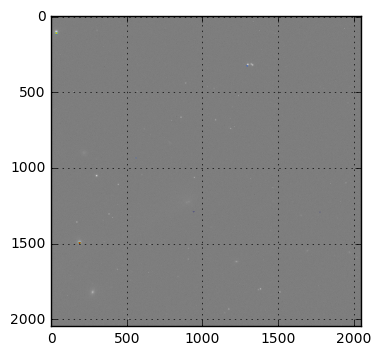

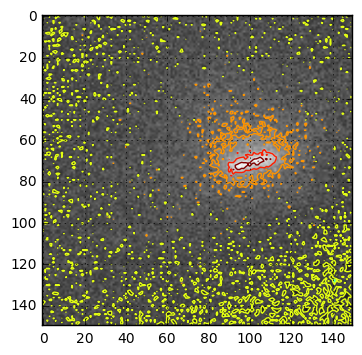

In [21]:
import astropy.io.fits as pf
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

imloc = glob.glob("C:/Users/dirmu/Documents/fieldtrip/comet67p/Reduce/Im1_f.fits")


O = pf.open(imloc[0])
D = O[0].data


plt.imshow(D,cmap='gray', norm=LogNorm())
plt.contour(D)
plt.grid()
plt.show()

D_c = D[1160:1310,800:950]
plt.imshow(D_c,cmap="gray", norm=LogNorm())
plt.contour(D_c,10)
plt.grid()
plt.show()

In [70]:
print(imloc)

[]


In [68]:
# https://github.com/andersbll/ipcv/blob/master/examples/isophotes.py

import numpy as np
import scipy as sp
from ipcv import gradient_orientation
from ipcv.misc import isophotes
from ipcv.util import imsave


def visualize():
    ''' Visualize the shape index responses. '''
    img = sp.misc.imread('data/patterns.png', flatten=True)
    go, go_m = gradient_orientation(img, 3)
    iso_go = isophotes(go, 5, (-np.pi, np.pi), .5, 'gaussian')
    imsave('isophotes/patterns-go.png', go*go_m)
    for i in range(iso_go.shape[0]):
        imsave('isophotes/patterns-go_iso_%i_gaussian.png'%i,
               iso_go[i, ...]*go_m)
    iso_go = isophotes(go, 5, (-np.pi, np.pi), .5, 'von_mises')
    for i in range(iso_go.shape[0]):
        imsave('isophotes/patterns-go_iso_%i_von_mises.png'%i,
               iso_go[i, ...]*go_m)


if __name__ == '__main__':
    visualize()

ImportError: No module named 'ipcv'

In [37]:
D_b = D*1500

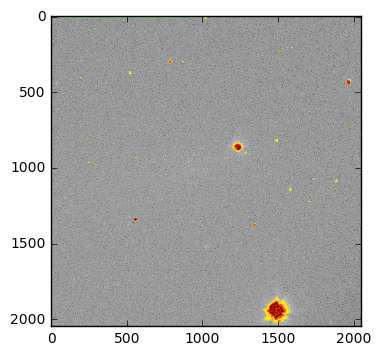

In [49]:


plt.imshow(D_b, cmap="gray", norm = LogNorm())
plt.contour(D_b)
# plt.xlim(1000,1500)
# plt.ylim(500,1000)
plt.show()

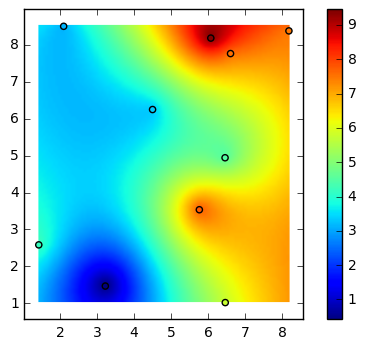

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

# Generate data:
x, y, z = 10 * np.random.random((3,10))

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
plt.scatter(x, y, c=z)
plt.colorbar()
plt.show()

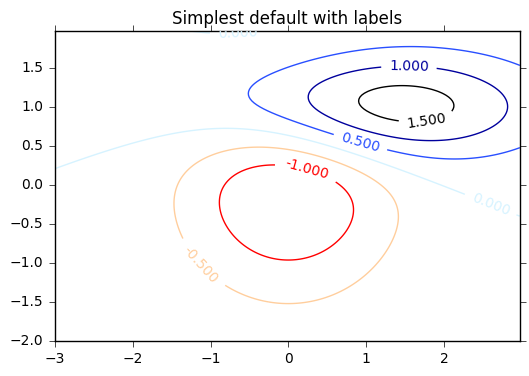

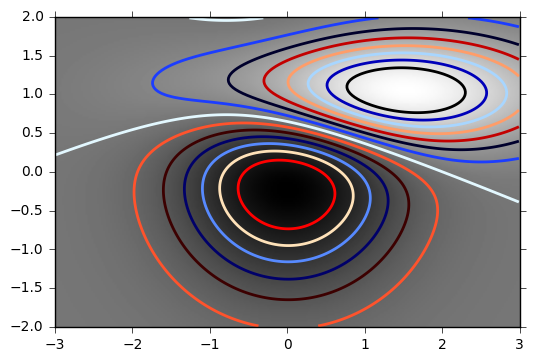

In [17]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# # contour labels can be placed manually by providing list of positions
# # (in data coordinate). See ginput_manual_clabel.py for interactive
# # placement.
# plt.figure()
# CS = plt.contour(X, Y, Z)
# manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
# plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
# plt.title('labels at selected locations')


# # You can force all the contours to be the same color.
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  colors='k',  # negative contours will be dashed by default
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Single color - negative contours dashed')

# # You can set negative contours to be solid instead of dashed:
# matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  colors='k',  # negative contours will be dashed by default
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Single color - negative contours solid')


# # And you can manually specify the colors of the contour
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  linewidths=np.arange(.5, 4, .5),
#                  colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# # Thicken the zero contour.
# zc = CS.collections[6]
# plt.setp(zc, linewidth=4)

# plt.clabel(CS, levels[1::2],  # label every second level
#            inline=1,
#            fmt='%1.1f',
#            fontsize=14)

# # make a colorbar for the contour lines
# CB = plt.colorbar(CS, shrink=0.8, extend='both')

# plt.title('Lines with colorbar')
# #plt.hot()  # Now change the colormap for the contour lines and colorbar
# plt.flag()

# # We can still add a colorbar for the image, too.
# CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# # This makes the original colorbar look a bit out of place,
# # so let's improve its position.

# l, b, w, h = plt.gca().get_position().bounds
# ll, bb, ww, hh = CB.ax.get_position().bounds
# CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()